## Loading data of training dataset

In [1]:
import pandas as pd
df = pd.read_csv('titanic_kaggle_comp/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Sex'>

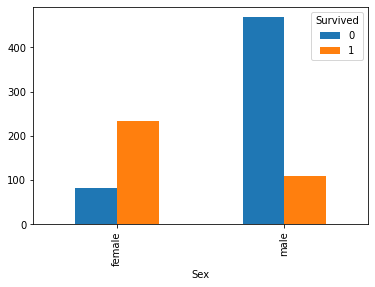

In [4]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar', stacked=False)

<AxesSubplot:xlabel='Pclass'>

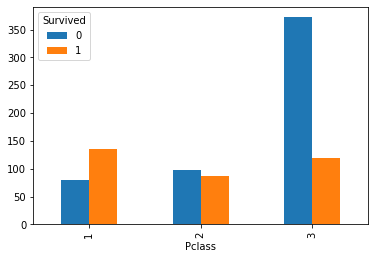

In [5]:
pd.crosstab(df.Pclass,df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

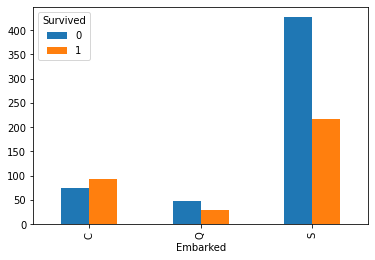

In [6]:
pd.crosstab(df.Embarked,df.Survived).plot(kind='bar', stacked=False)

<AxesSubplot:xlabel='Fare'>

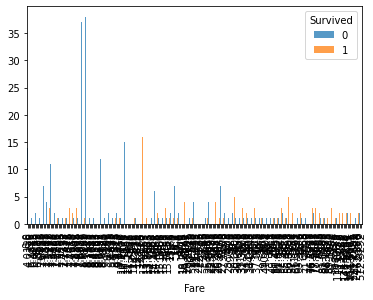

In [7]:
pd.crosstab(df.Fare,df.Survived).plot(kind='bar', stacked=False, alpha=0.75)


### Insights:
    1. We can drop the whole 'Cabin' column as more than 50% has NaN values.
    2. We can also not take 'Embarked' column into consideration as it does not show any specific outcome.
    3. 'PassengerId', 'Name' and 'Ticket' columns are also not important as it has all unique entries.
    4. We will also not take 'SibSp' and 'Parch' as they are not important.
    5. There are certain tickets of s[ecofoc Fares in which there are no casualities. 

## Deleting following columns as they are useless

In [8]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


## Filling NaN values in 'Age' column

In [10]:
df['Age'].isna().sum()

177

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [13]:
df.head(30)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
5,0,3,male,29.699118,8.4583
6,0,1,male,54.000000,51.8625
7,0,3,male,2.000000,21.0750
8,1,3,female,27.000000,11.1333
9,1,2,female,14.000000,30.0708


## Converting data in strings to int 

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df['sex_le'] = le.fit_transform(df['Sex'])   #male = 1 and female = 0 

In [16]:
df.drop('Sex',axis=1,inplace=True)

In [17]:
df.head()

,Survived,Pclass,Age,Fare,sex_le
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


## Creating X and y to give in a model

In [18]:
X = df.drop('Survived',axis=1)

In [19]:
y = df['Survived']

## Using DecisionTreeClassifier as the model 

In [20]:
from sklearn import tree

In [21]:
model = tree.DecisionTreeClassifier()

In [22]:
model.fit(X,y)

DecisionTreeClassifier()

##  Loading Test Data

In [23]:
df_test = pd.read_csv('titanic_kaggle_comp/titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
df_test.shape

(418, 11)

In [25]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
df_sub = df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
df_sub.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [27]:
df_sub.fillna(df.mean(), inplace=True)

In [28]:
df_sub.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [29]:
df_sub['sex_le'] = le.fit_transform(df_sub['Sex'])   #male = 1 and female = 0 

In [30]:
df_sub.drop('Sex',axis=1,inplace=True)

In [31]:
df_sub.head()

,Pclass,Age,Fare,sex_le
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [32]:
X_test = df_sub

In [33]:
predictions = model.predict(X_test)
predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Conclusion:
<html>
    <b>This model scored 74.4% accuracy in kaggle competition.</b>
  </html>

In [34]:
df_test['Predicted_Survival'] = predictions

In [35]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted_Survival
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [36]:
df_sub['sex_le'] = df_sub['sex_le'].map({1:'male', 0:'female'})

In [37]:
df_sub

,Pclass,Age,Fare,sex_le
0,3,34.500000,7.8292,male
1,3,47.000000,7.0000,female
2,2,62.000000,9.6875,male
3,3,27.000000,8.6625,male
4,3,22.000000,12.2875,female
...,...,...,...,...
413,3,29.699118,8.0500,male
414,1,39.000000,108.9000,female
415,3,38.500000,7.2500,male
416,3,29.699118,8.0500,male


In [38]:
df_submission = pd.DataFrame().assign(PassengerId=df_test['PassengerId'], Survived=df_test['Predicted_Survival'])

In [39]:
df_submission.set_index('PassengerId', inplace=True)

In [40]:
df_submission

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,1
...,...
1305,0
1306,1
1307,0


In [41]:
#df_submission.to_csv('titanic_analysis_decissiontree.csv')

In [43]:
from sklearn.svm import SVC
model2 = SVC()

In [44]:
model2.fit(X,y)

SVC()

In [45]:
X_test

,Pclass,Age,Fare,sex_le
0,3,34.500000,7.8292,male
1,3,47.000000,7.0000,female
2,2,62.000000,9.6875,male
3,3,27.000000,8.6625,male
4,3,22.000000,12.2875,female
...,...,...,...,...
413,3,29.699118,8.0500,male
414,1,39.000000,108.9000,female
415,3,38.500000,7.2500,male
416,3,29.699118,8.0500,male


In [46]:
X_test['sex_le'] = X_test['sex_le'].map({'male':1,'female':0})

In [48]:
predictions2 = model2.predict(X_test)
predictions2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [49]:
df_test['Predicted_Survival_svc'] = predictions2

In [50]:
df_submission2 = pd.DataFrame().assign(PassengerId=df_test['PassengerId'], Survived=df_test['Predicted_Survival_svc'])

In [53]:
df_submission2.set_index('PassengerId',inplace=True)

KeyError: "None of ['PassengerId'] are in the columns"

In [54]:
df_submission2.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [55]:
df_submission2.to_csv('titanic_analysis_svm.csv')

# Conclusion of SVM
<html>
    <b>This model scored 66.26% accuracy</b>
</html>

In [56]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()

In [57]:
model3.fit(X,y)

LogisticRegression()

In [58]:
prediction3 = model3.predict(X_test)
prediction3

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
df_test['Predicted_Survival_LR'] = prediction3

In [61]:
df_submission3 = pd.DataFrame().assign(PassengerId=df_test['PassengerId'], Survived=df_test['Predicted_Survival_LR'])

In [62]:
df_submission3.set_index('PassengerId',inplace=True)
df_submission3.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [63]:
df_submission3.to_csv('titanic_analysis_lr.csv')

# Conclusion of LR
<html>
    <b>This model scored 75.59% accuracy</b>
</html>